In [1]:
import itertools
import sympy as sm
import numpy as np
import matplotlib.pyplot as plt
from scipy import constants as con
from matplotlib_inline.backend_inline import set_matplotlib_formats
from qutip import qeye, sigmax, sigmay, sigmaz, tensor, create, destroy
from qutip import fidelity, tracedist

plt.style.use('seaborn-v0_8')
plt.rcParams |= {
    'text.usetex': False,
    'figure.figsize': (8, 4)
}
set_matplotlib_formats('svg', 'pdf')

In [2]:
# https://mareknarozniak.com/2020/10/14/jordan-wigner-transformation/
def Is(i, levels=2): return [qeye(levels) for j in range(0, i)]
def Sx(N, i): return tensor(Is(i) + [sigmax()] + Is(N - i - 1))
def Sy(N, i): return tensor(Is(i) + [sigmay()] + Is(N - i - 1))
def Sz(N, i): return tensor(Is(i) + [sigmaz()] + Is(N - i - 1))
def I(N): return Sz(N, 0)*Sz(N, 0)

def osum(lst): 
    return np.sum(np.array(lst, dtype=object))

def oprd(lst, d=None):
    if len(lst) == 0:
        return d
    p = lst[0]
    for U in lst[1:]:
        p = p*U
    return p

# N is the exponent, L is the length of the chain
def opow(L, op, N): return oprd([op for i in range(N)])

def commutator(A, B):
    return A*B - B*A

def anticommutator(A, B):
    return A*B + B*A

def gamma_a(N, n, Opers=None):
    Sa, Sb, Sc = Sz, Sx, Sy
    if Opers is not None:
        Sa, Sb, Sc = Opers
    return oprd([Sb(N, j) for j in range(n)], d=I(N)) * Sa(N, n)

def gamma_b(N, n, Opers=None):
    Sa, Sb, Sc = Sz, Sx, Sy
    if Opers is not None:
        Sa, Sb, Sc = Opers
    return oprd([Sb(N, j) for j in range(n)], d=I(N)) * Sc(N, n)

## measurement-only braiding, symbolisim

In [13]:
N = 6
S_num = 8
Ss = [sm.symbols(f"S_{i}") for i in range(1,S_num+1)]
gammas = [sm.symbols(f'\gamma_{i}') for i in range(1, N+1)]
M = sm.symbols('M')

def prj_meas(i, j, s):
    return (1 + sm.I * Ss[s-1] * gammas[i-1] * gammas[j-1])

In [14]:
meas_eq = sm.Eq(M, prj_meas(2, 3, 1) * prj_meas(4, 5, 2)
                 * prj_meas(1, 2, 3) * prj_meas(3, 4, 4)
                 * prj_meas(2, 4, 5) * prj_meas(3, 6, 6)
                 * prj_meas(2, 3, 7) * prj_meas(4, 5, 8))
meas_eq

Eq(M, (I*S_1*\gamma_2*\gamma_3 + 1)*(I*S_2*\gamma_4*\gamma_5 + 1)*(I*S_3*\gamma_1*\gamma_2 + 1)*(I*S_4*\gamma_3*\gamma_4 + 1)*(I*S_5*\gamma_2*\gamma_4 + 1)*(I*S_6*\gamma_3*\gamma_6 + 1)*(I*S_7*\gamma_2*\gamma_3 + 1)*(I*S_8*\gamma_4*\gamma_5 + 1))

In [114]:
def calc_prj_meas(Ss):
    return (
        (1 + 1j * Ss[0] * gamma_b(3, 0) * gamma_a(3, 1))
        * (1 + 1j * Ss[1] * gamma_b(3, 1) * gamma_a(3, 2))
        * (1 + 1j * Ss[2] * gamma_a(3, 0) * gamma_b(3, 0))
        * (1 + 1j * Ss[3] * gamma_a(3, 1) * gamma_b(3, 1))
        * (1 + 1j * Ss[4] * gamma_b(3, 0) * gamma_b(3, 1))
        * (1 + 1j * Ss[5] * gamma_a(3, 1) * gamma_b(3, 2))
        * (1 + 1j * Ss[6] * gamma_b(3, 0) * gamma_a(3, 1))
        * (1 + 1j * Ss[7] * gamma_b(3, 1) * gamma_a(3, 2))
    )

# making edges are the same fermion, to take prtial trace esaily.
def calc_prj_meas(Ss, N=3):
    assert len(Ss) == 2**N
    return (
          (1 + 1j * Ss[0] * gamma_a(N, 1) * gamma_b(N, 1))
        * (1 + 1j * Ss[1] * gamma_a(N, 2) * gamma_b(N, 2))
        
        * (1 + 1j * Ss[2] * gamma_a(N, 0) * gamma_a(N, 1))
        * (1 + 1j * Ss[3] * gamma_b(N, 1) * gamma_a(N, 2))
                                      
        * (1 + 1j * Ss[4] * gamma_a(N, 1) * gamma_a(N, 2))
        * (1 + 1j * Ss[5] * gamma_b(N, 1) * gamma_b(N, 0))
        
        * (1 + 1j * Ss[6] * gamma_a(N, 1) * gamma_b(N, 1))
        * (1 + 1j * Ss[7] * gamma_a(N, 2) * gamma_b(N, 2))
    )

def fid(matrix1, matrix2):
    vec1 = np.array(matrix1).flatten()
    vec1 /= np.linalg.norm(vec1)
    
    vec2 = np.array(matrix2).flatten()
    vec2 /= np.linalg.norm(vec2)
    
    return np.round(np.vdot(vec1, vec2)**2, 15)

In [136]:
N = 4
def get_prj_meas(Ss, N=3):
    assert N > 2
    assert len(Ss) == 2**N, "size of `Ss` array must be 2^N"
    res = []
    for i in range(1, 2*N-1, 2):
        res.append([i, i + 1])
    
    if N % 2 == 0 :
        
    
    return res
get_prj_meas([1]*2**N, N)

[[1, 2], [3, 4], [5, 6]]

In [115]:
braiding = (gamma_a(3, 0) * gamma_b(3, 0) * np.pi/4).expm()
br = braiding.ptrace(0)

fid(br, br)

(1+0j)

In [111]:
combinations = np.array(tuple(itertools.product([0, 1], repeat=8)))

In [116]:
fids = np.zeros(2**8, dtype='complex')
for i in np.arange(2**8):
    fids[i] = fid(braiding.ptrace(0), calc_prj_meas(combinations[i]).ptrace(0))

In [117]:
max_indices = np.where(fids == fids.max())
fids[max_indices], combinations[max_indices]

(array([1.+0.j, 1.+0.j, 1.+0.j, 1.+0.j]),
 array([[0, 0, 1, 1, 1, 1, 0, 0],
        [0, 0, 1, 1, 1, 1, 0, 1],
        [0, 1, 1, 1, 1, 1, 0, 0],
        [0, 1, 1, 1, 1, 1, 0, 1]]))

/Users/ammar-imac/.pyenv/versions/3.11.1/lib/python3.11/site-packages/matplotlib/transforms.py:762: ComplexWarning: Casting complex values to real discards the imaginary part
  points = np.asarray(points, float)


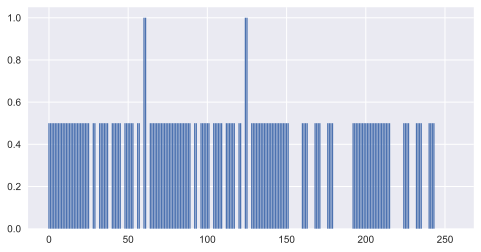

In [131]:
plt.bar(np.arange(2**8), fids)
plt.show()

## Visualization of Dots

In [36]:
class KitaevTJunction:
    def __init__(self, N: int):
        assert N > 1 and isinstance(N, int)
        self.N = N
        
    @property
    def config(self):
        ''' N is number of pairs of
        Majorona fermions'''
        x = list(range(2 * (self.N-1)))
        y = [0] * len(x)

        # middle pair
        mid = x[-1] / 2
        x += [mid, mid]
        y += [-1, -2]

        return [x, y]

    @staticmethod
    def _split_list(input_list, chunk_size):
        """Split a list into a list of lists with a specified chunk size."""
        return [input_list[i:i + chunk_size] for i in range(0, len(input_list), chunk_size)]

    def plot_config(self, ax=None):
        if ax is None:
            ax = plt.gca()
        ax.scatter(*self.config)

    def plot_measurements(self, step=1, ax=None):
        x, y = self.config
        if ax is None:
            ax = plt.gca()
        
        if step in [1, 4]:
            ax.plot(x[-2:], y[-2:], c='b')
            x = x[:-2]; y = y[:-2]
            for i in range(1, 2*self.N, 2):
                s = slice(i, i+2)
                ax.plot(x[s], y[s], c='b')
            
        elif step == 2:
            mid = x[-1]
            x = x[:-3]; y = y[:-3]
            x += [mid]; y += [-1]
            for i in range(0, 2*self.N, 2):
                s = slice(i, i+2)
                ax.plot(x[s], y[s], c='b')
        
        elif step == 3:
            mid = x[-1]
            x = x[:-3]; y = y[:-3]
            x += [mid]; y += [-1]
            print(x, y)
            for i in range(1, 2*self.N, 2):
                s = slice(i, i+2)
                ax.plot(x[s], y[s], c='b')
        
        else:
            raise ValueError("`step` must be integer within [1, 4]")
            

        ax.set_title(f"Step {step} Measurements")
        ax.set_xticks([])
        ax.set_yticks([])

[0, 1, 2, 1.5] [0, 0, 0, -1]


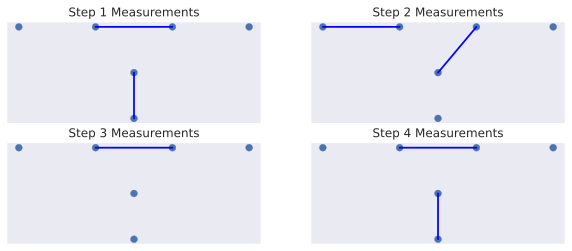

In [42]:
kitaev = KitaevTJunction(3)

fig, axes = plt.subplots(2, 2, figsize=(10, 4))
axes = axes.flatten()

for i in range(4):
    kitaev.plot_config(axes[i])
    kitaev.plot_measurements(i+1, axes[i])

plt.show()